In [1]:
#En este ejemplo utilizaremos la regresión logística para reconocer dígitos escritos a mano (de 0 a 9).

#El reconocimiento automático de dígitos es ampliamente utilizado en la actualidad- desde el reconocimiento de códigos
#postales en sobre hasta el reconocimiento de cantidades escritos en cheques bancarios.

#El dataset contiene 5000 digitos donde cada fila corresponde a datos de la imagen en escala de grises de 20px x 20px. Es
#decir, tenemos 400 atributos o pixeles que representan a cada dígito. Cada pixel contiene un número real correspondiente
#a la intensidad de la escala de gris correspondiente a dicha ubicación.

#Por otro lado se tiene un vector de 5000x1 que corresponde al dígito que se está representando (la clase a reconocer).
#En este caso se tienen clases del 1 al 10 donde el 10 mapea el valor 0. Esto hace que sean más facil manejar los indices.

In [3]:
#Configuraciones iniciales
options(scipen = 999, repr.plot.width=4, repr.plot.height= 4, warn = -1)

In [4]:
#Instalación y carga de paquetes necesarios
list.of.packages <- c('R.matlab')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cran.r-project.org")

library(R.matlab)

R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen



In [7]:
#Carga de datos
digits <- as.data.frame(readMat('ex3data1.mat'))

str(digits)
head(digits)

'data.frame':	5000 obs. of  401 variables:
 $ X.1  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.2  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.3  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.4  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.5  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.6  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.7  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.8  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.9  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.10 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.11 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.12 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.13 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.14 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.15 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.16 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.17 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.18 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.19 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.20 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.21 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.22 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.23 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.24 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X.25 : num  0 0 0 

X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,X.392,X.393,X.394,X.395,X.396,X.397,X.398,X.399,X.400,y
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [54]:
X <- df[,1:400]
y <- df[, 401]

In [55]:
#Inicialización de

y
  1   2   3   4   5   6   7   8   9  10 
500 500 500 500 500 500 500 500 500 500 

In [56]:
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;

In [57]:
rand_indices <- sample(m, 100)
sel <- X[rand_indices, ]

In [58]:
visualizarDigitos <- function(X) {
    
    
    example_width <- round(sqrt(dim(X)[2]))
    
    if (is.vector(X))
        X <- t(X)
  
    # Calcular número de filas y columnas
    m <- dim(X)[1]
    n <- dim(X)[2]

    example_height <- (n / example_width) #altura en pixeles de c/imagen

    # Cantidad de observaciones a mostrar
    display_rows <- floor(sqrt(m)) #10
    display_cols <- ceiling(m / display_rows) #10
           
    # Espaciado entre dígitos
    pad <- 1

    display_array <- -matrix(0,pad + display_rows * (example_height + pad), pad + display_cols * (example_width + pad))
    curr_ex <- 1

    for (j in 1:display_rows) {
        for (i in 1:display_cols) {
          if (curr_ex > m)
            break
      
          max_val <- max(abs(X[curr_ex,]))
          display_array[pad + (j - 1) * (example_height + pad) + (1:example_height), pad + (i - 1) * (example_width + pad) + 
                        (1:example_width)] <- matrix(unlist(X[curr_ex,]), example_height, example_width) / max_val
          curr_ex <- curr_ex + 1
        }
    
        if (curr_ex > m)
          break
    }

    # Mostrar imagen
    op <- par(bg = "gray")

    #La imagen se dibuja por fila de abajo a arriba, pero R indexa las matrices por columnas, de arriba a abajo
    dispArr <- t(apply(display_array,2,rev))

    image(z = dispArr, col = gray.colors(100), xaxt = 'n', yaxt = 'n')

    grid(nx = display_cols, display_rows, col = 'black', lwd = 2, lty = 1)
    box()
    par(op)
    
}

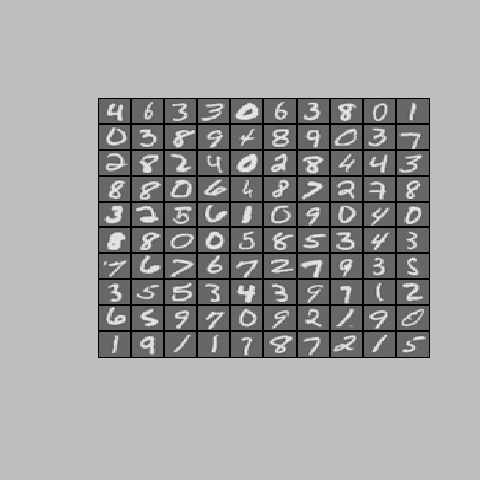

In [30]:
#Visualizamos una muestra del dataset
visualizarDigitos(sel)

In [59]:
lambda <- 0.1

In [60]:
#Creamos la función sigmoidal
sigmoid <- function(z) {
  
  g <- 1 / (1 + exp(1) ^ (-z))
}

In [61]:
#Construimos la función de costo 
computeCost <- function(theta) {
    
    hyp <-  sigmoid(X %*% theta)
    
    J_noreg <- (-1 / m) * (t(y) %*% log(hyp) + (t((1 - y)) %*% log(1 - hyp)))
        
    theta[1] <- 0
    
    J_reg <- J_noreg + (lambda / (2 * m)) * sum(theta ^ 2)
    
    J_reg
    
}

In [45]:
oneVsAll <- function(X, y, num_labels, lambda) {
    
    m <- nrow(X)
    n <- ncol(X)
    
    all_theta <- matrix(0, num_labels, n + 1)
    
    #Agrego el término de intercepto en X
    X <- cbind(1,X)
    
    for(c in 1:num_labels) {
        
        initial_theta <- matrix(0, n + 1, 1)
        temp_y <- (y == c)
        
        theta_optim <- optim(par = initial_theta, fn = computeCost)
        
        all_theta[c, ] <- t(theta_optim)
    }
    
}

In [48]:
#all_theta <- oneVsAll(X, y, num_labels, lambda)

In [62]:
m <- nrow(X)
n<- ncol(X)
all_theta <- matrix(0, num_labels, n + 1)
dim(all_theta)
X <- cbind(1,X)



[1]  10 401

In [65]:
c <- 3
initial_theta <- matrix(0, n + 1, 1)
dim(initial_theta)

[1] 401   1

In [67]:
temp_y <- (y == c)
   
theta_optim <- optim(par = initial_theta, fn = computeCost)
theta_optim

ERROR: Error in X %*% theta: requires numeric/complex matrix/vector arguments


In [ ]:

        
all_theta[c, ] <- t(theta_optim)